# PCOS Detection using Machine Learning

This project detects PCOS (Polycystic Ovary Syndrome) using symptom-based features like irregular cycles, pimples, and BMI — without requiring medical tests. The model is built using Python, trained in Google Colab, and deployed with Streamlit.


Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

Uploading Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving PCOS_data.csv to PCOS_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['PCOS_data.csv']))

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df = df.dropna()

df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


Selecting Relevant Features

In [5]:
print(df.columns.tolist())

['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [7]:
selected = [
    ' Age (yrs)',
    'Weight (Kg)',
    'BMI',
    'Cycle(R/I)',
    'hair growth(Y/N)',
    'Skin darkening (Y/N)',
    'Pimples(Y/N)',
    'Fast food (Y/N)',
    'Reg.Exercise(Y/N)',
    'PCOS (Y/N)'
]

df = df[selected]
df.head()

,Age (yrs),Weight (Kg),BMI,Cycle(R/I),hair growth(Y/N),Skin darkening (Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),PCOS (Y/N)
0,28,44.6,19.3,2,0,0,0,1.0,0,0
1,36,65.0,24.9,2,0,0,0,0.0,0,0
2,33,68.8,25.3,2,0,0,1,1.0,0,1
3,37,65.0,29.7,2,0,0,0,0.0,0,0
4,25,52.0,20.1,2,0,0,0,0.0,0,0


Data Analysis

<Axes: >

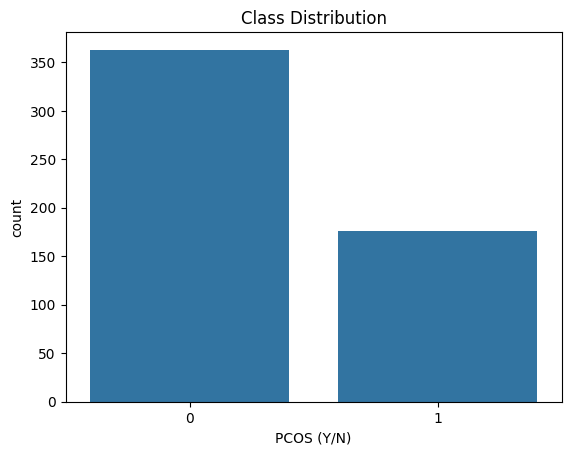

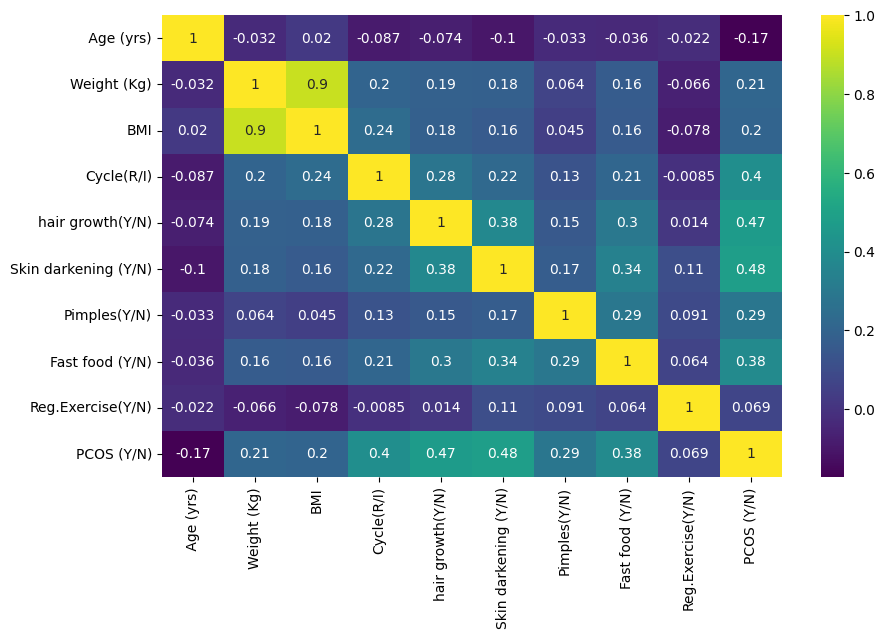

In [8]:
# Target distribution
sns.countplot(data=df, x='PCOS (Y/N)')
plt.title("Class Distribution")

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Data Preprocessing

In [9]:
X = df.drop('PCOS (Y/N)', axis=1)
y = df['PCOS (Y/N)']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training model

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

Evaluating Model

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        80
           1       0.77      0.61      0.68        28

    accuracy                           0.85       108
   macro avg       0.82      0.77      0.79       108
weighted avg       0.85      0.85      0.85       108



Text(0.5, 1.0, 'Confusion Matrix')

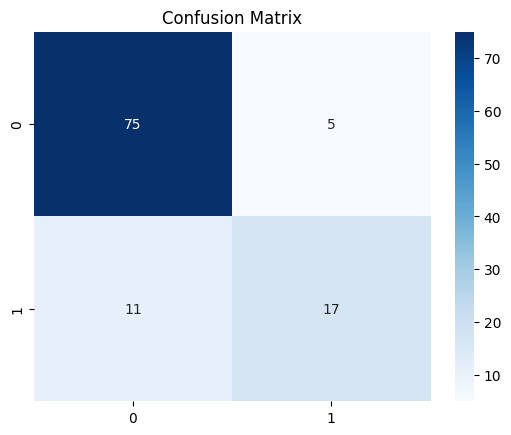

In [11]:
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")

Accuracy:  0.85
Precision: 0.77
Recall:    0.61
F1 Score:  0.68


Class Balance

/tmp/ipython-input-13-2717099911.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='PCOS (Y/N)', palette='Set2')


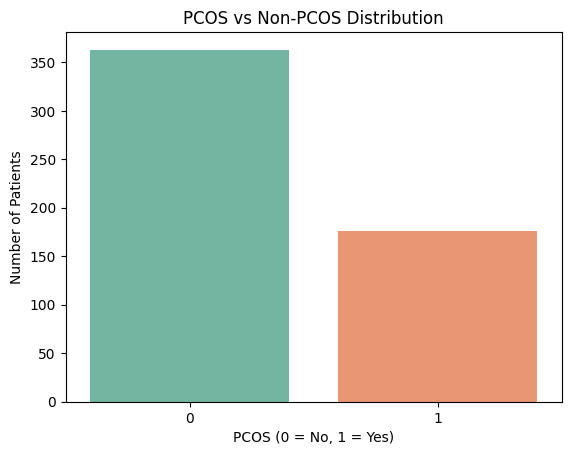

In [13]:
sns.countplot(data=df, x='PCOS (Y/N)', palette='Set2')
plt.title("PCOS vs Non-PCOS Distribution")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()

Correlation Heatmap

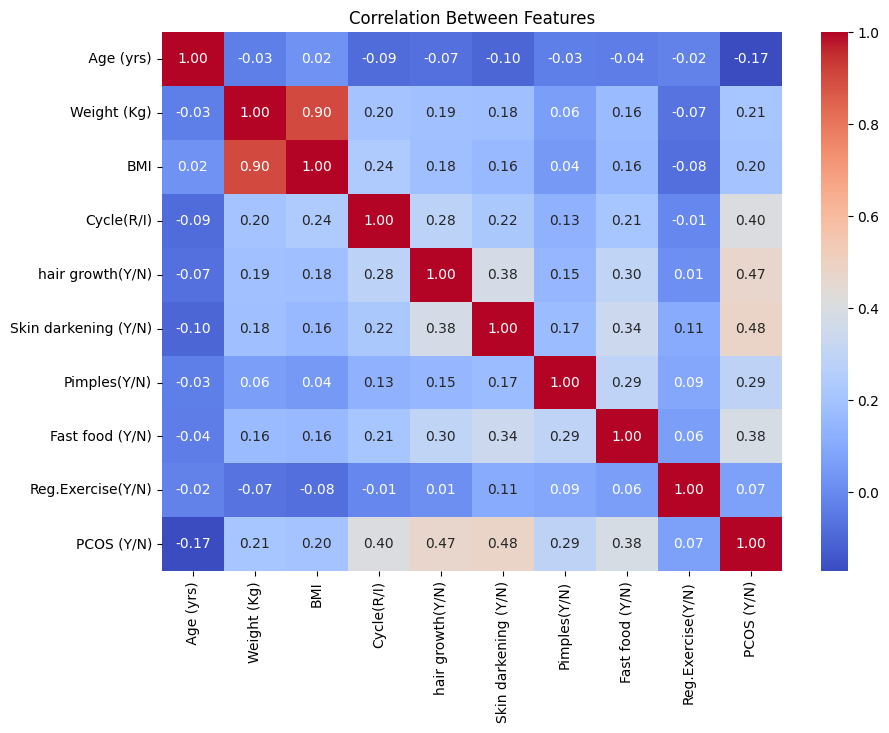

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Features")
plt.show()

PCOS vs BMI Distribution

/tmp/ipython-input-15-3165610768.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='PCOS (Y/N)', y='BMI', palette='Pastel1')


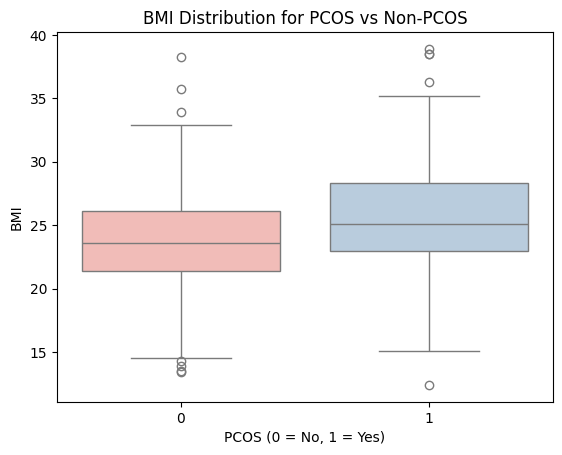

In [15]:
sns.boxplot(data=df, x='PCOS (Y/N)', y='BMI', palette='Pastel1')
plt.title("BMI Distribution for PCOS vs Non-PCOS")
plt.xlabel("PCOS (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()

Count of Lifestyle Factors (Hair Growth, Pimples, etc.)

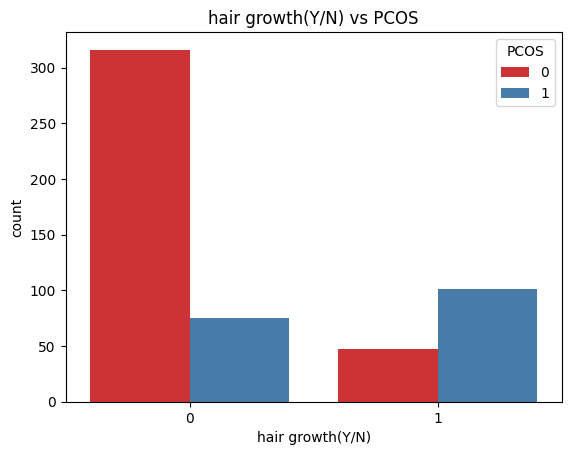

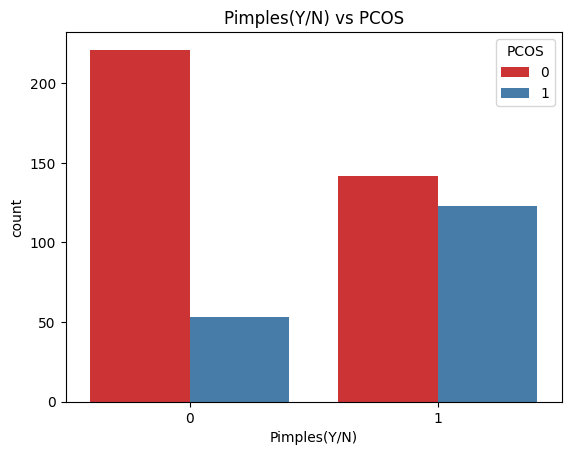

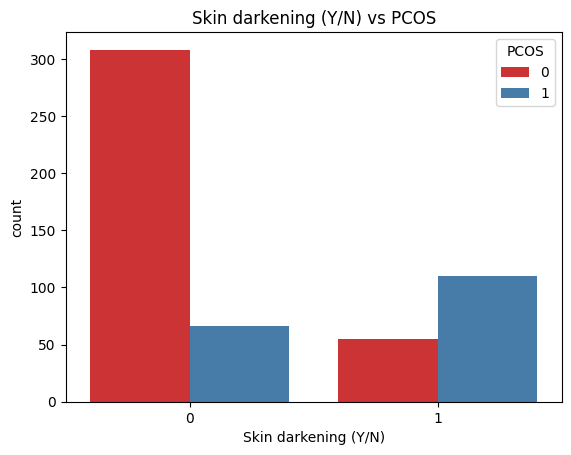

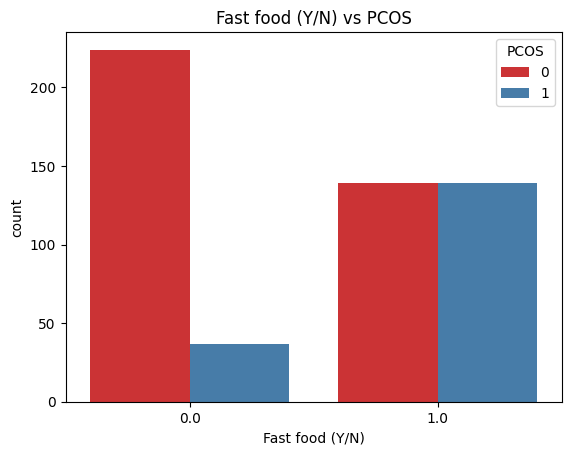

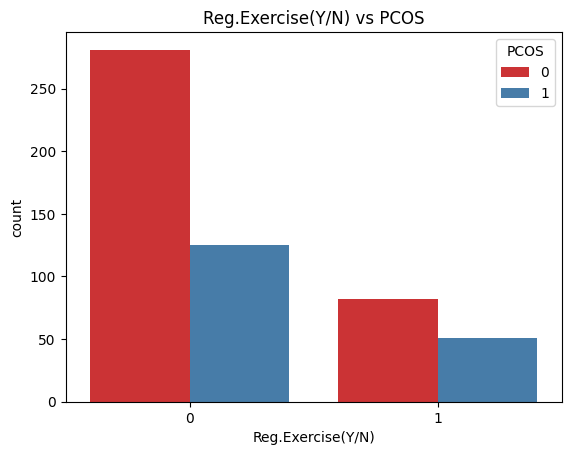

In [16]:
symptoms = ['hair growth(Y/N)', 'Pimples(Y/N)', 'Skin darkening (Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

for feature in symptoms:
    sns.countplot(data=df, x=feature, hue='PCOS (Y/N)', palette='Set1')
    plt.title(f"{feature} vs PCOS")
    plt.legend(title='PCOS')
    plt.show()

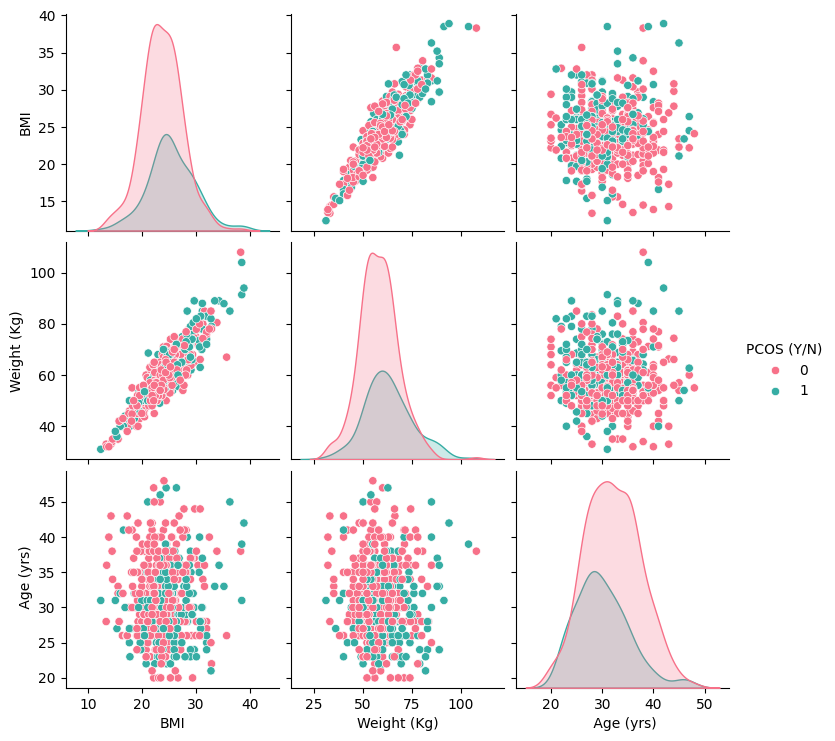

In [18]:
import seaborn as sns

sns.pairplot(df, hue='PCOS (Y/N)', vars=['BMI', 'Weight (Kg)', ' Age (yrs)'], palette='husl')


Saving

In [19]:
joblib.dump(model, 'pcos_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [20]:
files.download('pcos_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>